What is Embedding?
Embeddings are vectors that represent real-world objects, like words, images, or videos, in a form that machine learning models can easily process.

In [12]:
import ollama
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv(
      "https://raw.githubusercontent.com/mistralai/cookbook/main/data/Symptom2Disease.csv",
    index_col=0,
)

In [34]:
df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
295,diabetes,I'm shaking and trembling all over. I've lost ...
296,diabetes,"Particularly in the crevices of my skin, I hav..."
297,diabetes,I regularly experience these intense urges and...
298,diabetes,"I have trouble breathing, especially outside. ..."


In [9]:
# Extract documents (text) and labels from the DataFrame
documents = df["text"].values  # Assuming 'text' is the column with the document text
labels = df["label"].values  # Assuming 'label' is the column with the labels


In [13]:
# Generate TF-IDF embeddings
tfidf_vectorizer = TfidfVectorizer()
tfidf_embeddings = tfidf_vectorizer.fit_transform(documents).toarray()

In [37]:
tfidf_embeddings[0]

array([0., 0., 0., ..., 0., 0., 0.], shape=(1544,))

In [14]:
# Generate Nomic embeddings (each will have ~700 dimensions)
nomic_embeddings = np.array([
    ollama.embeddings(model='nomic-embed-text', prompt=doc).get('embedding')
    for doc in documents
])

In [38]:
embed = ollama.embeddings( model='nomic-embed-text', prompt="I have been experiencing a skin rash on my arms, legs, and torso for the past few weeks. It is red, itchy, and covered in dry, scaly patches.")

In [24]:
# Apply PCA to reduce from 700D (Nomic) and higher-dimensional TF-IDF to 3D
pca_nomic = PCA(n_components=2)
reduced_nomic_embeddings = pca_nomic.fit_transform(nomic_embeddings)

pca_tfidf = PCA(n_components=2)
reduced_tfidf_embeddings = pca_tfidf.fit_transform(tfidf_embeddings)

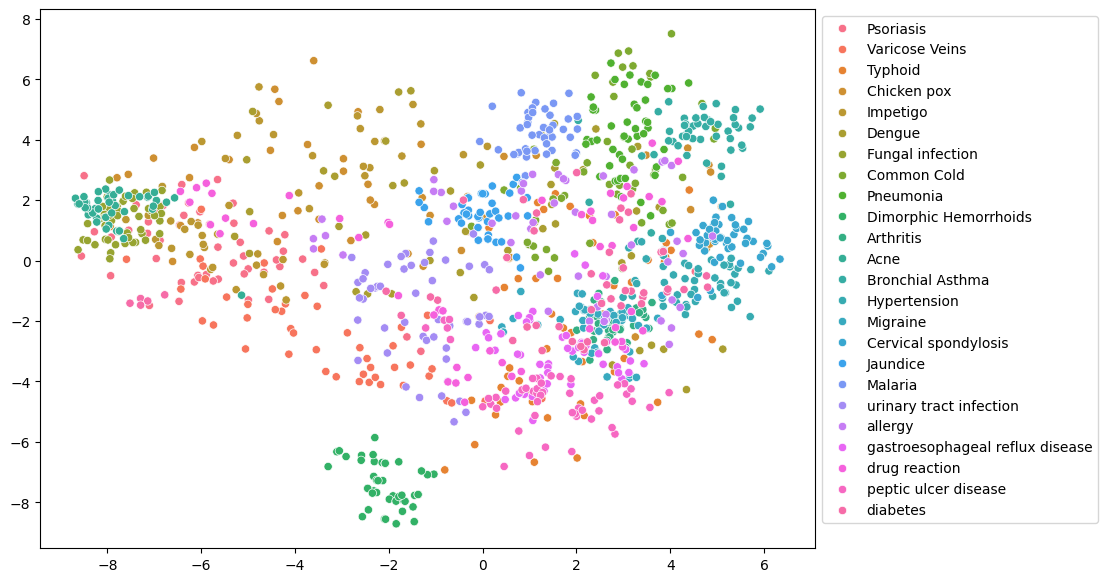

In [28]:
# Create a Seaborn scatterplot for 2D plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot Nomic embeddings with a 'o' marker (circle)
sns.scatterplot(
    x=reduced_nomic_embeddings[:, 0], y=reduced_nomic_embeddings[:, 1],hue=np.array(df['label'].to_list())
)

# Adjust legend to the upper left and move it outside the plot
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))





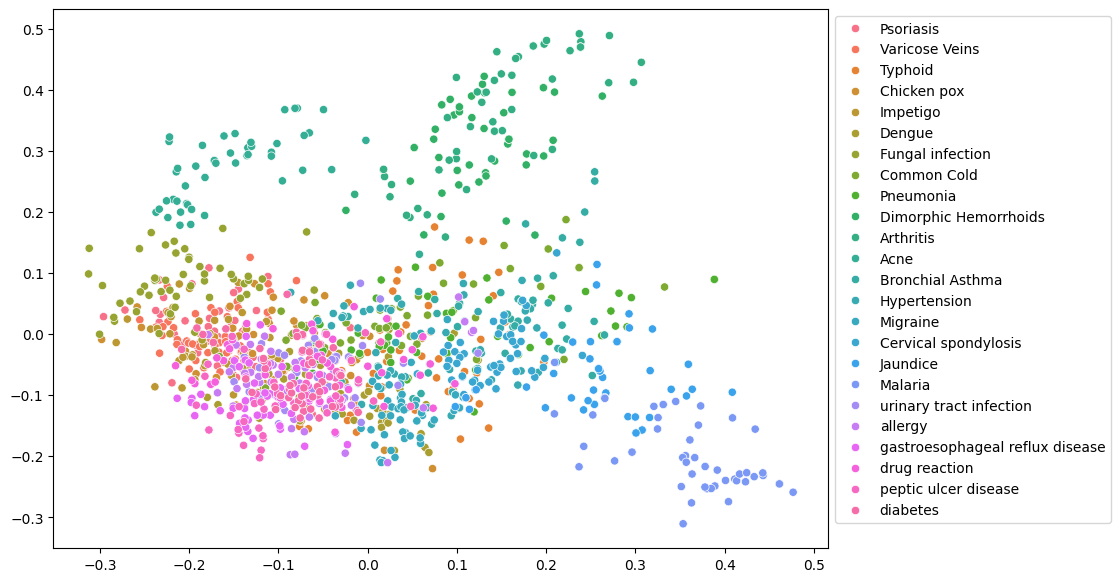

In [30]:
# Create a Seaborn scatterplot for 2D plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot TF-IDF embeddings with a '^' marker (triangle)
sns.scatterplot(
    x=reduced_tfidf_embeddings[:, 0], y=reduced_tfidf_embeddings[:, 1],hue=np.array(df['label'].to_list())
)


# Adjust legend to the upper left and move it outside the plot
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
